In [1]:
import sys
sys.path.append('../')

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from lib import load_curvecurator, plot_fit_type, plot_fit, fit

In [2]:
palette = sns.color_palette("tab10")
palette = {
    "Target": palette[0],
    "Off-target": palette[1],
    "Both": palette[2],
}

Text(0.5, 1.0, 'Afatinib')

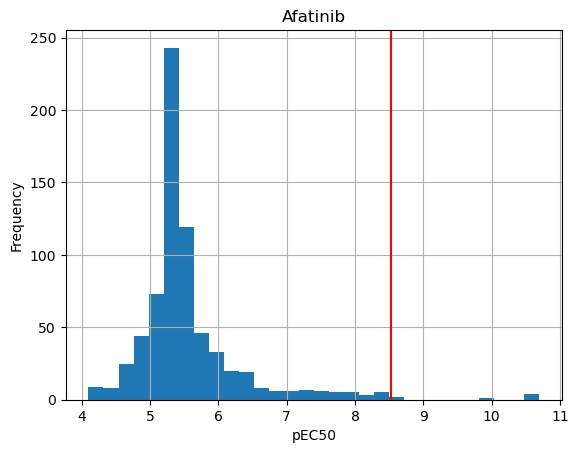

In [3]:
drugs = {
    "Afatinib": {
        'identifier': "10184653/2reps_only",
        'target_ec50_nm': 3,
    },
    "Lapatinib": {
        "identifier": "208908",
        "target_ec50_nm": 65,
    },
    "PF-3758309": {
        "identifier": "25227462",
        'target_ec50_nm': 3,
    },
    "Dasatinib": {
        "identifier": "3062316",
        'target_ec50_nm': 5,
    },
    "92131101": {
        "identifier": "92131101",
        'target_ec50_nm': 10,
    },
    "Tipifarnib": {
        "identifier": "159324",
        'target_ec50_nm': 40,
    },
    "Docetaxel": {
        "identifier": "9877265",
        'target_ec50_nm': 50,
    },
    "168312962": {
        "identifier": "168312962",
        'target_ec50_nm': 40,
    },
    "Selumetinib": {
        "identifier": "10127622",
        'target_ec50_nm': 200,
    },
    "11364421": {
        "identifier": "11364421",
        'target_ec50_nm': 8,
    },
    "Bleomycin": {
        "identifier": "46930982",
        'target_ec50_nm': 50,
    },
    "Alisertib": {
        "identifier": "24771867",
        'target_ec50_nm': 30,
    },
    "Oligomycin A": {
        "identifier": "6364620",
        'target_ec50_nm': 30,
    },
    "Trametinib": {
        "identifier": "11707110",
        'target_ec50_nm': 20,
    },
    "Leptomycin B": {
        "identifier": "6917907",
        'target_ec50_nm': 30,
    },
    "Vincristine": {
        "identifier": "5388993",
        'target_ec50_nm': 100,
    },
    "Idelalisib": {
        "identifier": "11625818",
        'target_ec50_nm': 80,
    },
    "Rapamycin": {
        "identifier": "5284616",
        'target_ec50_nm': 30,
    },
}

drug = "Afatinib"

df_curvecurator, df_doses = load_curvecurator(drugs[drug]['identifier'])
target_ec50_µm = drugs[drug]['target_ec50_nm'] / 1e3
target_range_start = target_ec50_µm / 10
target_range_end = target_ec50_µm * 10

df_curvecurator["pEC50"].hist(bins=30)
plt.axvline(-np.log10(target_ec50_µm)+6, color="red") # +6 because the EC50 is in µM and the pEC50 requires M
# Set x-axis label
plt.xlabel("pEC50")
# Set y-axis label
plt.ylabel("Frequency")
plt.title(drug)

In [4]:
df_curvecurator = fit(df_curvecurator, df_doses, target_range_start, target_range_end)

<Axes: xlabel='sigmoid_diff', ylabel='Count'>

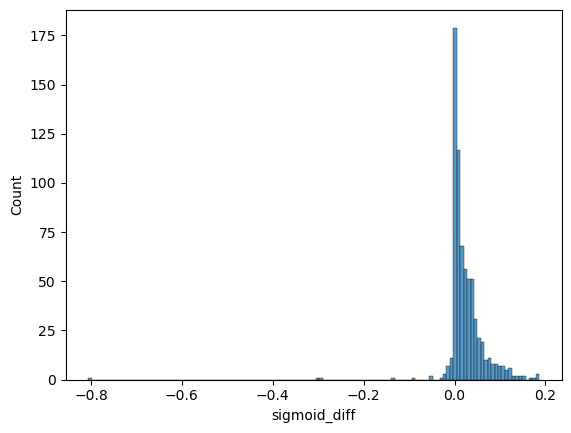

In [5]:
sns.histplot(df_curvecurator, x="sigmoid_diff")

<Axes: xlabel='target_effect_size', ylabel='Count'>

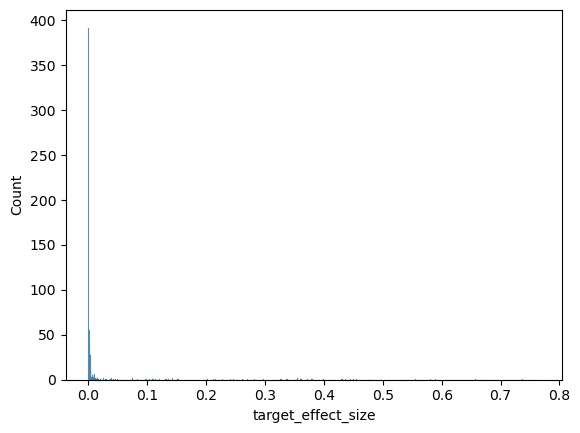

In [6]:
sns.histplot(df_curvecurator, x="target_effect_size")

Front: 1.00, Back: 0.82, Slope: 500000.000000002, EC50: 0.00


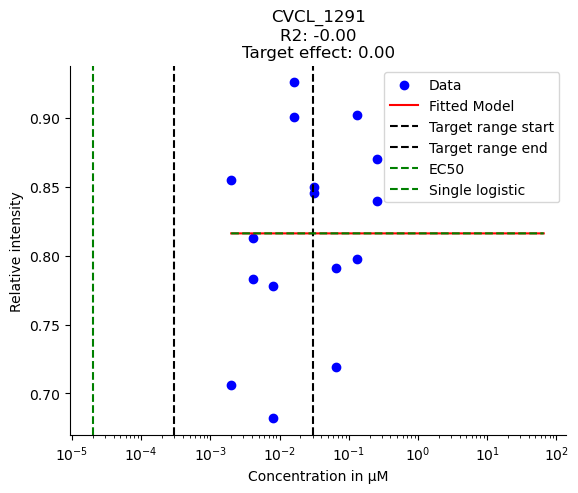

Front: 1.00, Middle: 0.82, Back: 0.82, PEC50 1: 0.00, PEC50 2: 244.78, Slope 1: 83456.70, Slope 2: 0.12


In [7]:
df_increasing_sigdiff = df_curvecurator[df_curvecurator["sigmoid_diff"] < 0.0].sort_values("sigmoid_diff", ascending=False)
plot_fit(df_curvecurator, df_doses, df_increasing_sigdiff.index[-3], target_range_start, target_range_end)

Front: 0.98, Back: 0.15, Slope: 118.12574801630518, EC50: 0.02


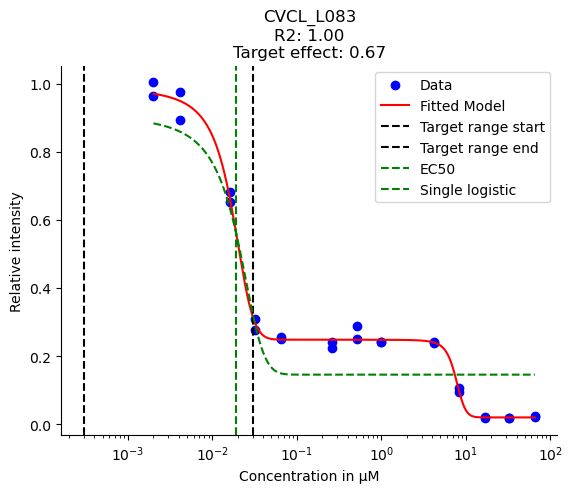

Front: 0.98, Middle: 0.25, Back: 0.15, PEC50 1: 0.02, PEC50 2: 7.64, Slope 1: 178.66, Slope 2: 0.95


In [8]:
plot_fit(df_curvecurator, df_doses, "CVCL_L083", target_range_start, target_range_end)

Front: 1.00, Back: 0.82, Slope: 500000.000000002, EC50: 0.00


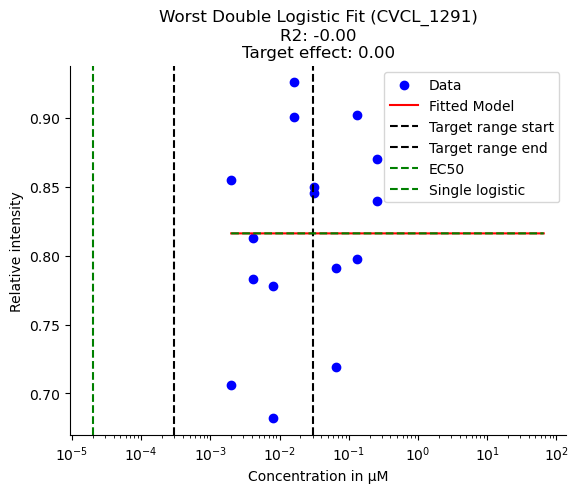

Front: 1.00, Middle: 0.82, Back: 0.82, PEC50 1: 0.00, PEC50 2: 244.78, Slope 1: 83456.70, Slope 2: 0.12
Front: 1.01, Back: 0.03, Slope: 1.7139937466140578, EC50: 5.83


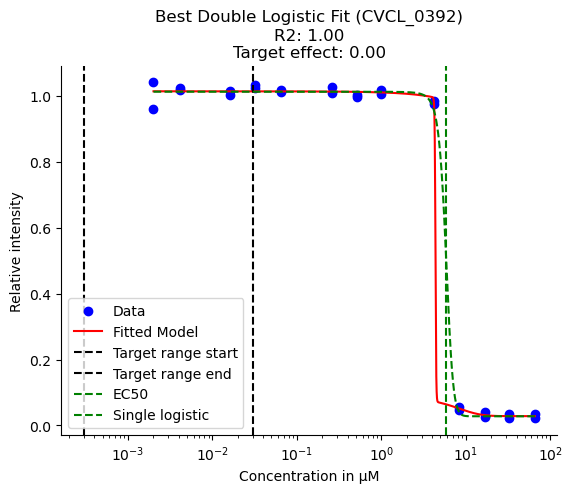

Front: 1.01, Middle: 0.11, Back: 0.03, PEC50 1: 4.38, PEC50 2: 5.38, Slope 1: 22.83, Slope 2: 0.28
Front: 0.94, Back: 0.00, Slope: 0.08596377868868772, EC50: 5.37


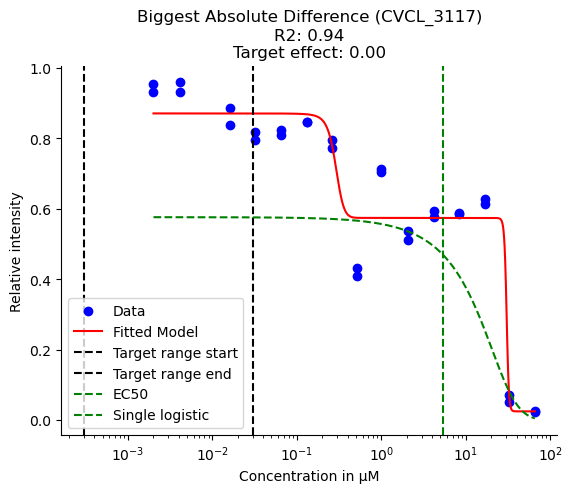

Front: 0.94, Middle: 0.57, Back: 0.00, PEC50 1: 0.29, PEC50 2: 30.55, Slope 1: 30.41, Slope 2: 1.07
Front: 0.64, Back: 0.00, Slope: 0.1706221168752444, EC50: 58.61


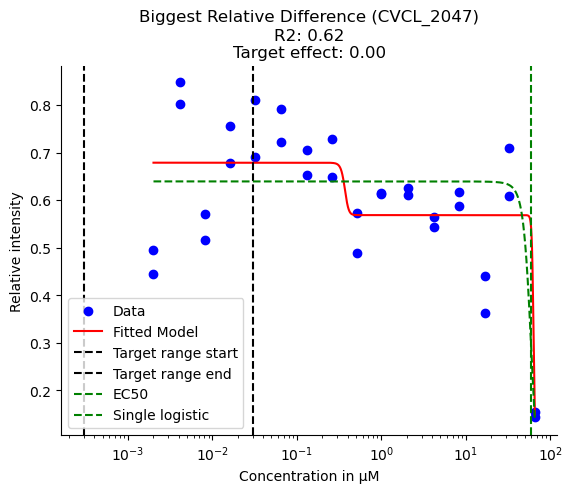

Front: 0.64, Middle: 0.57, Back: 0.00, PEC50 1: 0.37, PEC50 2: 63.65, Slope 1: 51.24, Slope 2: 0.71
Front: 0.94, Back: 1.97, Slope: 0.21708866211790012, EC50: 17.67


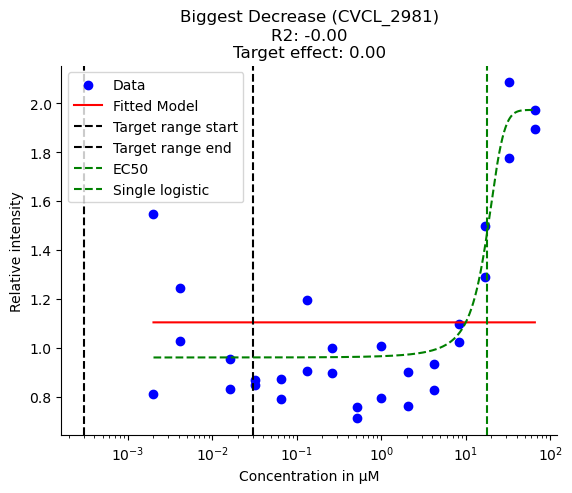

Front: 0.94, Middle: 1.10, Back: 1.97, PEC50 1: 0.00, PEC50 2: 6194.75, Slope 1: 19568.46, Slope 2: 0.00
Front: 1.00, Back: 0.05, Slope: 15832.333645002907, EC50: 0.00


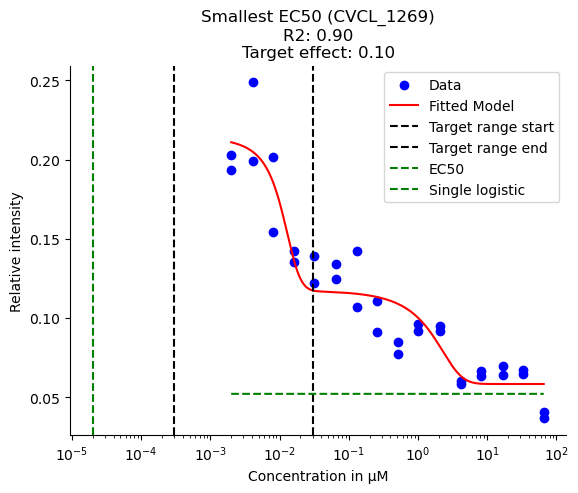

Front: 1.00, Middle: 0.14, Back: 0.05, PEC50 1: 0.01, PEC50 2: 1.01, Slope 1: 265.87, Slope 2: 0.87
Front: 1.03, Back: 0.00, Slope: 0.01160925545810968, EC50: 79.58


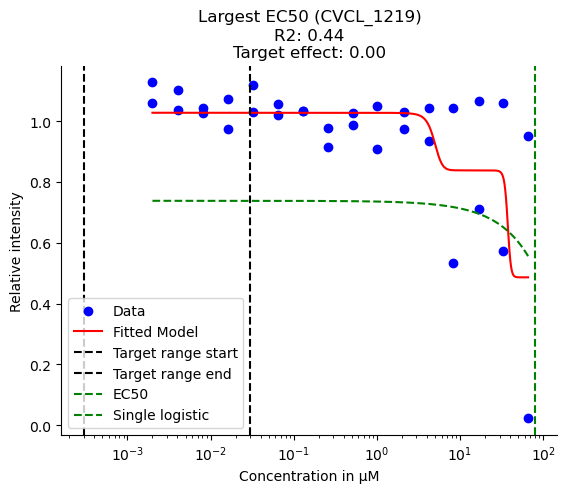

Front: 1.03, Middle: 0.84, Back: 0.00, PEC50 1: 4.92, PEC50 2: 37.53, Slope 1: 1.81, Slope 2: 0.60


In [9]:
worst_single = df_curvecurator["single_r2"].idxmin()
best_single = df_curvecurator["single_r2"].idxmax()
worst_double = df_curvecurator["double_r2"].idxmin()
best_double = df_curvecurator["double_r2"].idxmax()
largest_diff_abs = df_curvecurator["sigmoid_diff"].idxmax()
largest_dec_abs = df_curvecurator["sigmoid_diff"].idxmin()
smallest_ec50 = df_curvecurator["EC50"].idxmin()
largest_ec50 = df_curvecurator["EC50"].idxmax()
largest_diff_rel = (df_curvecurator["sigmoid_diff"] / df_curvecurator["single_r2"]).idxmax()

plot_fit(df_curvecurator, df_doses, worst_double, target_range_start, target_range_end, title=f'Worst Double Logistic Fit ({worst_double})')
plot_fit(df_curvecurator, df_doses, best_double, target_range_start, target_range_end, title=f'Best Double Logistic Fit ({best_double})')
plot_fit(df_curvecurator, df_doses, largest_diff_abs, target_range_start, target_range_end, title=f'Biggest Absolute Difference ({largest_diff_abs})')
plot_fit(df_curvecurator, df_doses, largest_diff_rel, target_range_start, target_range_end, title=f'Biggest Relative Difference ({largest_diff_rel})')
plot_fit(df_curvecurator, df_doses, largest_dec_abs, target_range_start, target_range_end, title=f'Biggest Decrease ({largest_dec_abs})')
plot_fit(df_curvecurator, df_doses, smallest_ec50, target_range_start, target_range_end, title=f'Smallest EC50 ({smallest_ec50})')
plot_fit(df_curvecurator, df_doses, largest_ec50, target_range_start, target_range_end, title=f'Largest EC50 ({largest_ec50})')

In [10]:
#https://stackoverflow.com/a/71515035/2901002
def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{:.1f}%\n({v:d})'.format(pct, v=val)
        return my_format

Text(0.5, 0.98, 'Afatinib')

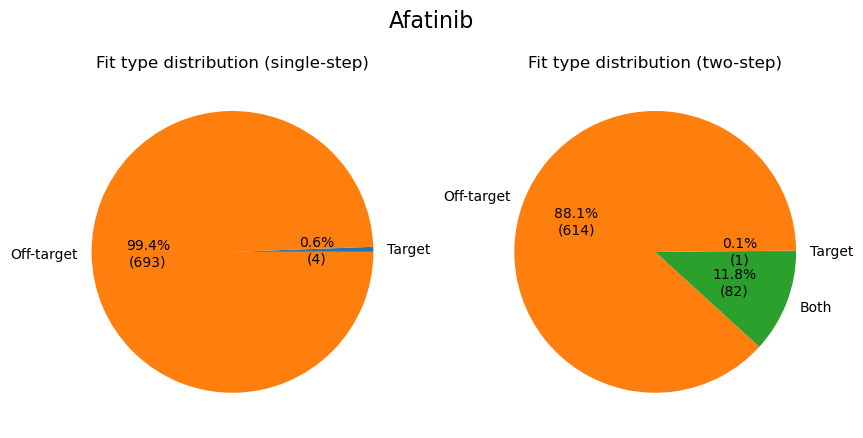

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

counts = df_curvecurator["single_step_is_target"].value_counts()
counts.index = counts.index.map({True: "Target", False: "Off-target"})
cols = ["Target", "Off-target"]
counts = counts.loc[cols]
counts.plot.pie(autopct=autopct_format(counts), title="Fit type distribution (single-step)", ax=axs[0], colors=[palette[col] for col in cols])

# Show absolute values
counts = df_curvecurator["Fit type"].value_counts()
cols = ["Target", "Off-target", "Both"]
counts = counts.loc[cols]
counts.plot.pie(autopct=autopct_format(counts), title="Fit type distribution (two-step)", ax=axs[1], colors=[palette[col] for col in cols])

for ax in axs:
    # Remove y-axis label
    ax.set_ylabel('')

# Set global title
plt.suptitle(drug, fontsize=16)

<Axes: xlabel='pEC50', ylabel='Count'>

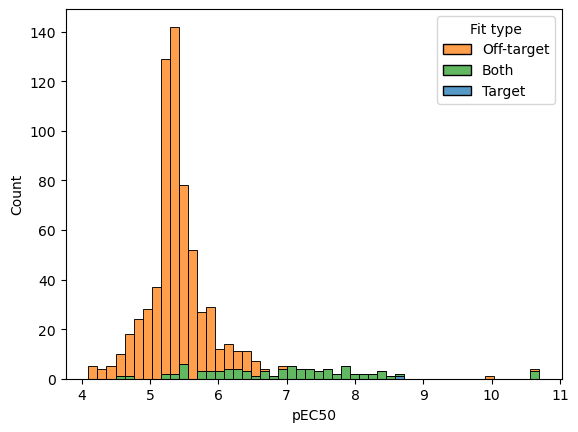

In [12]:
sns.histplot(df_curvecurator, x="pEC50", hue="Fit type", bins=50, multiple="stack", palette=palette)

<Axes: xlabel='target_effect_size', ylabel='Count'>

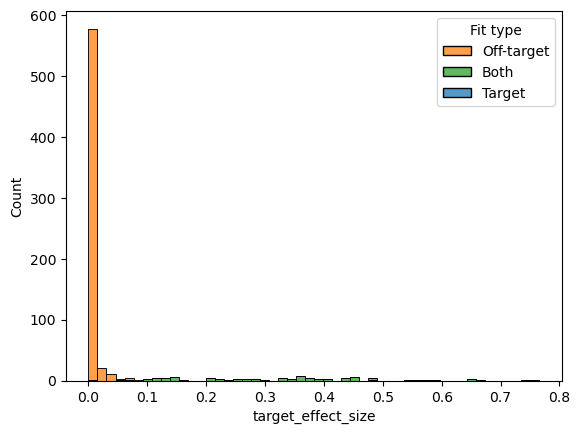

In [13]:
sns.histplot(df_curvecurator, x="target_effect_size", hue="Fit type", bins=50, multiple="stack", palette=palette)

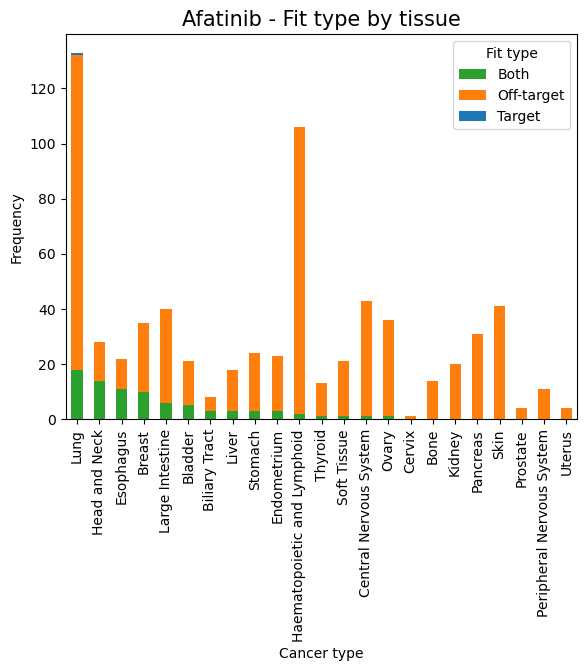

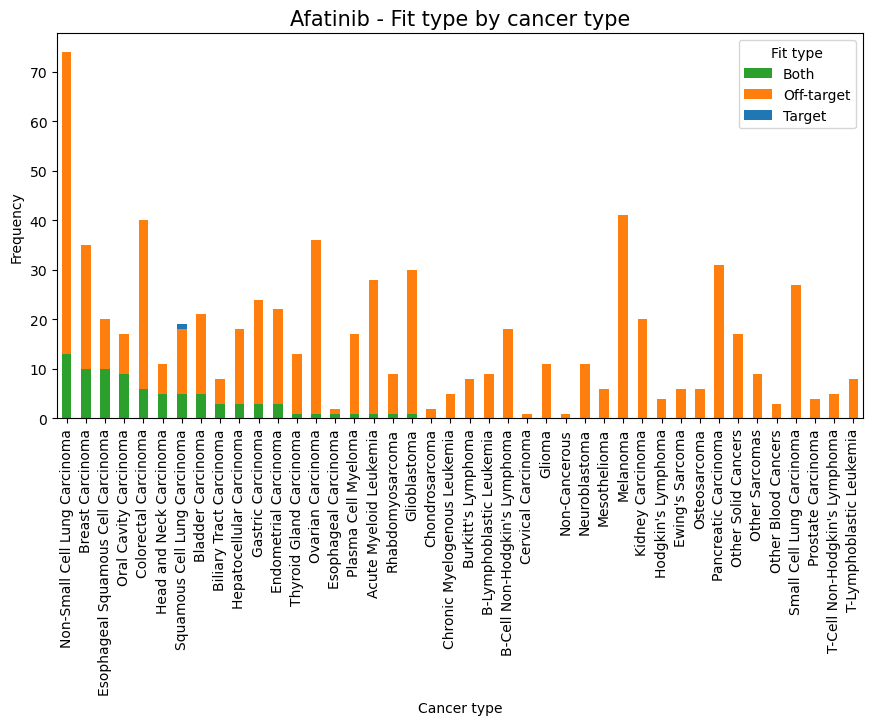

In [14]:
for category in ["tissue", "cancer_type"]:
    plot_fit_type(df_curvecurator, category, drug, palette)

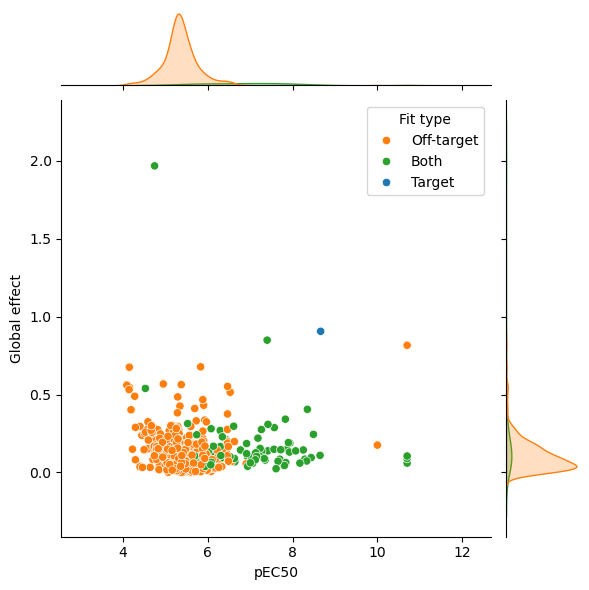

In [15]:
sns.jointplot(data=df_curvecurator, x="pEC50", y="Global effect", hue="Fit type", palette=palette)